In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
df=pd.read_csv('Germancredit.csv')
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,Yrows,Xcols
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,none,own,2,skilled employee/official,1,yes,yes,1,1,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,none,own,1,skilled employee/official,1,no,yes,0,1,2
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,none,own,1,unskilled - resident,2,no,yes,1,1,3
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,none,for free,1,skilled employee/official,2,no,yes,1,1,4
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,none,for free,2,skilled employee/official,2,no,yes,0,1,5


In [6]:
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk', 'Yrows',
       'Xcols'],
      dtype='object')

In [7]:
df.drop(['status', 'duration', 'purpose','savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],axis=1,inplace=True)

In [8]:
df.head()

,credit_history,amount,housing,number_credits,Yrows,Xcols
0,critical account/other credits existing,1169,own,2,1,1
1,existing credits paid back duly till now,5951,own,1,1,2
2,critical account/other credits existing,2096,own,1,1,3
3,existing credits paid back duly till now,7882,for free,1,1,4
4,delay in paying off in the past,4870,for free,2,1,5


In [9]:
credit=(np.asarray(df['credit_history'])).reshape(10,10)
amt=(np.asarray(df['amount'])).reshape(10,10)
H=(np.asarray(df['housing'])).reshape(10,10)
numb=(np.asarray(df['number_credits'])).reshape(10,10)

In [10]:
print(credit)
print(amt)
print(H)
print(numb)

[['critical account/other credits existing'
  'existing credits paid back duly till now'
  'critical account/other credits existing'
  'existing credits paid back duly till now'
  'delay in paying off in the past'
  'existing credits paid back duly till now'
  'existing credits paid back duly till now'
  'existing credits paid back duly till now'
  'existing credits paid back duly till now'
  'critical account/other credits existing']
 ['existing credits paid back duly till now'
  'existing credits paid back duly till now'
  'existing credits paid back duly till now'
  'critical account/other credits existing'
  'existing credits paid back duly till now'
  'existing credits paid back duly till now'
  'critical account/other credits existing'
  'no credits taken/all credits paid back duly'
  'existing credits paid back duly till now'
  'existing credits paid back duly till now']
 ['critical account/other credits existing'
  'existing credits paid back duly till now'
  'critical account/

In [11]:
result=df.pivot(index='Yrows',columns='Xcols',values='amount')
print(result)

Xcols    1     2     3      4     5      6     7      8      9     10
Yrows                                                                
1      1169  5951  2096   7882  4870   9055  2835   6948   3059  5234
2      1295  4308  1567   1199  1403   1282  2424   8072  12579  3430
3      2134  2647  2241   1804  2069   1374   426    409   2415  6836
4      1913  4020  5866   1264  1474   4746  6110   2100   1225   458
5      2333  1158  6204   6187  6143   1393  2299   1352   7228  2073
6      2333  5965  1262   3378  2225    783  6468   9566   1961  6229
7      1391  1537  1953  14421  3181   5190  2171   1007   1819  2394
8      8133   730  1164   5954  1977   1526  3965   4771   9436  3832
9      5943  1213  1568   1755  2315   1412  1295  12612   2249  1108
10      618  1409   797   3617  1318  15945  2012   2622   2337  7057


In [13]:
labels=(np.array(["{0} \n {1} \n {2} \n {3}".format(C,A,h,N) 
                  for C,A,h,N in zip(credit.flatten(),
                    amt.flatten(),
                    H.flatten(),
                    numb.flatten())])).reshape(10,10)

In [14]:
labels

array([['critical account/other credits existing \n 1169 \n own \n 2',
        'existing credits paid back duly till now \n 5951 \n own \n 1',
        'critical account/other credits existing \n 2096 \n own \n 1',
        'existing credits paid back duly till now \n 7882 \n for free \n 1',
        'delay in paying off in the past \n 4870 \n for free \n 2',
        'existing credits paid back duly till now \n 9055 \n for free \n 1',
        'existing credits paid back duly till now \n 2835 \n own \n 1',
        'existing credits paid back duly till now \n 6948 \n rent \n 1',
        'existing credits paid back duly till now \n 3059 \n own \n 1',
        'critical account/other credits existing \n 5234 \n own \n 2'],
       ['existing credits paid back duly till now \n 1295 \n rent \n 1',
        'existing credits paid back duly till now \n 4308 \n rent \n 1',
        'existing credits paid back duly till now \n 1567 \n own \n 1',
        'critical account/other credits existing \n 1199 

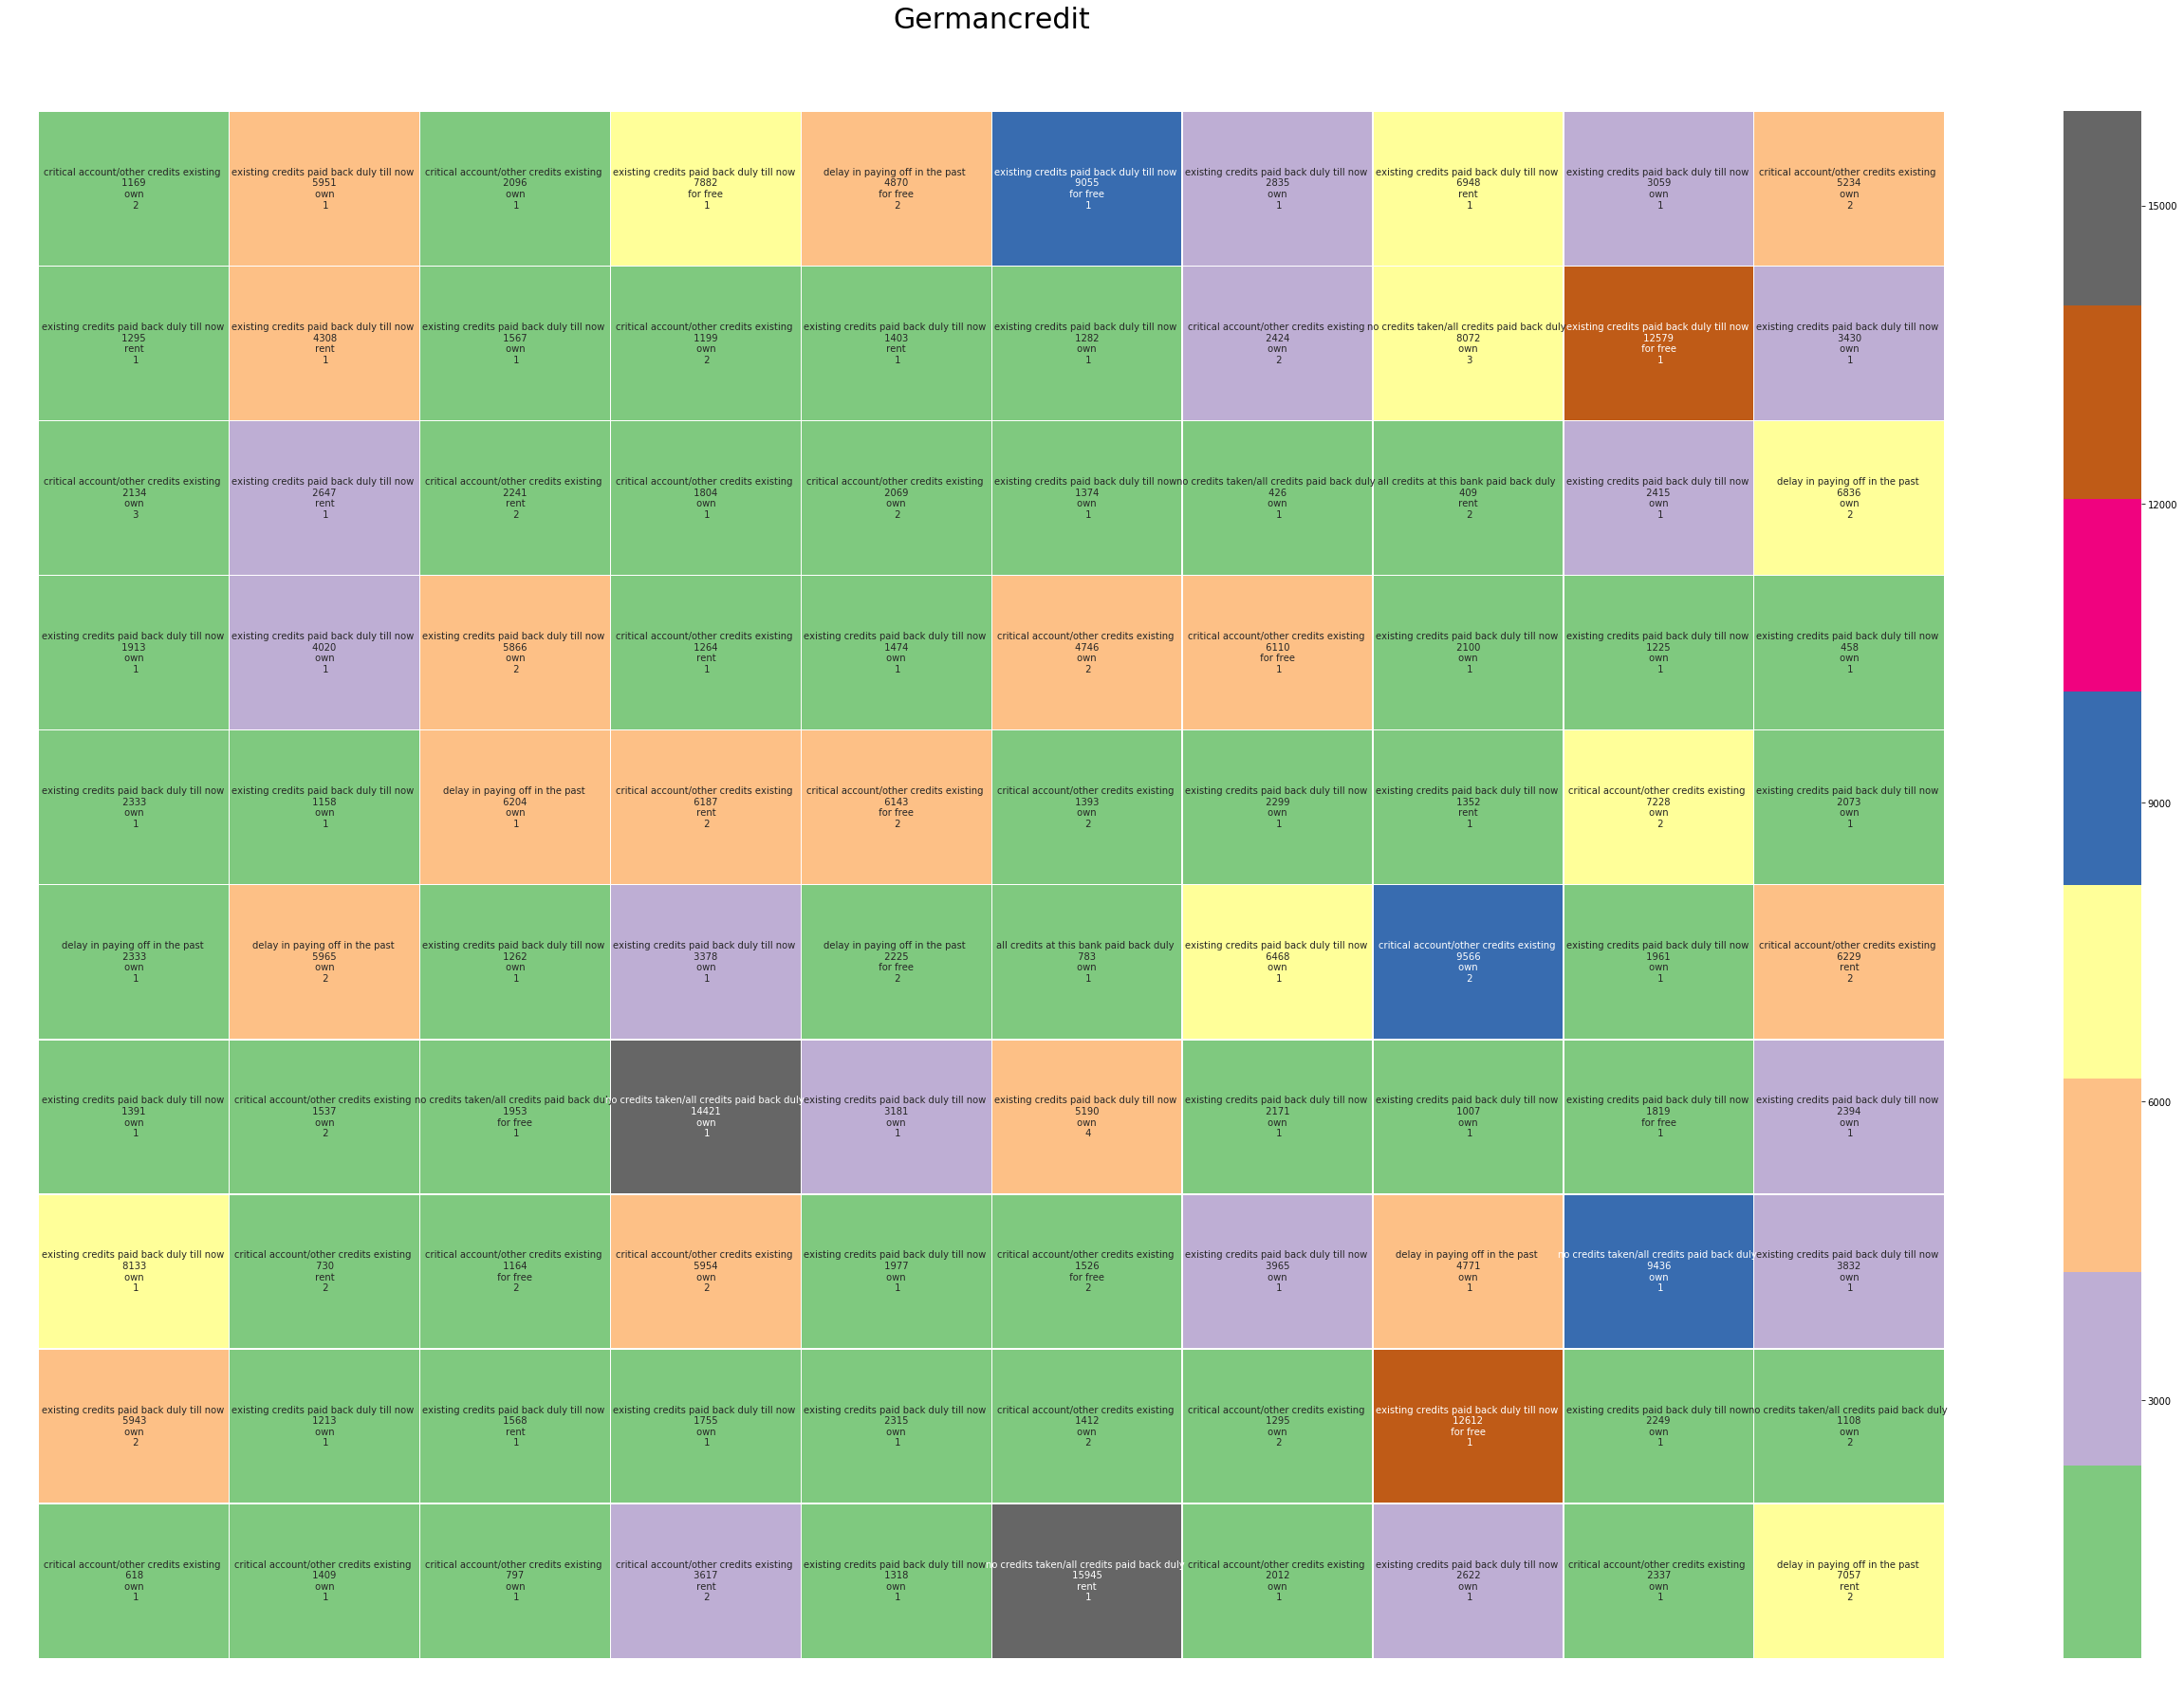

In [28]:
fig,ax=plt.subplots(figsize=(45,30))

#Add title to the heat map
title="Germancredit" #title is a variable to print title we use 'plt'

#Set the font size and the distance of the title from the plot
plt.title(title,fontsize=30)
ttl=ax.title
ttl.set_position([0.5,1.05])

#Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

#Remove the axes
ax.axis('off')


#Use the heatmap function from the seaborn package
sn.heatmap(result,annot=labels,fmt="",cmap='Accent',linewidths=0.30,ax=ax) #result is pivot value

#Display the Nifty 50
plt.show()

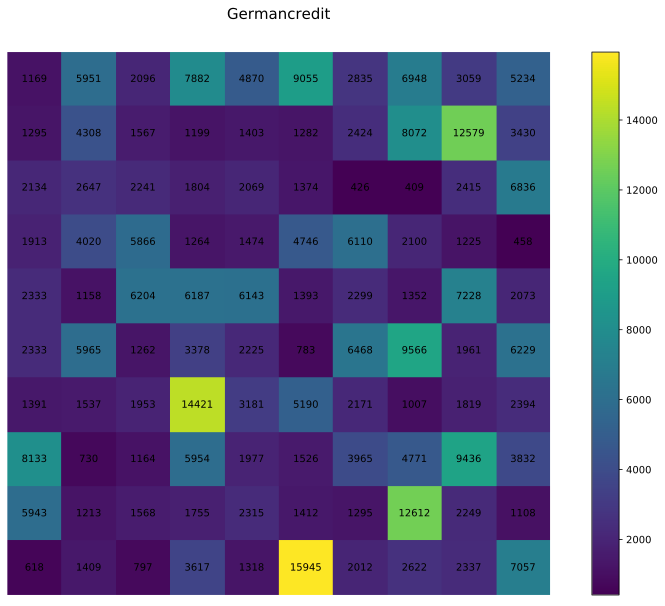

In [33]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

fig, ax = plt.subplots(figsize=(15,10))
title ="Germancredit"

# setthe font size and the distance of the title from the plot
plt.title(title,fontsize=15)
ttl=ax.title
ttl.set_position([0.5,1.05])
# hide ticks for x and y axis
ax.set_xticks([])
ax.set_yticks([])
# remove the axes
ax.axis('off')

im=ax.imshow(result)
fig.colorbar(im)

#using Url
for (j,i), x in np.ndenumerate(result):
    url = "https://www.google.com/search?q=germancredit&rlz=1C1CHBF_enIN852IN852&oq=germancredit&aqs=chrome..69i57j0l3j69i60l2.4715j1j7&sourceid=chrome&ie=UTF-8"
    ax.annotate(x, xy=(i,j), ha="center", va="center",
                url=url, bbox=dict(color='w', alpha=1e-6, url=url))
    
# display 
plt.show()